In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# if getting OptionError: "No such keys(s): 'mode.use_inf_as_null'"
# !pip install --upgrade seaborn pandas

import matplotlib as mpl
import os
from glob import glob

from _load_data import * # Getting our specific labels, formatting, and data

# Getting some free samples
results_df.sample(3)

print(gens)

# Don't change any code below, it may break (probably will) --------------------

['../models/SimplifierTopDownOnlyLast.py', '../models/Vanilla.py', '../models/SimplifierTopDown1e-2.py', '../models/SimplifierTopDown1e-1.py', '../models/SimplifierBottomUp.py', '../models/SimplifierTopDown1e-10.py', '../models/SimplifierBottomUpOnlyLast.py', '../models/SimplifierTopDown1e-6.py', '../models/SimplifierTopDown1e-4.py', '../models/SimplifierTopDown.py', '../models/SimplifierTopDown1e-0.py'] ['Top Down (only last)', 'Without simplify', 'Top Down 1e-2', 'Top Down 1e-1', 'Bottom Up', 'Top Down 1e-10', 'Bottom Up (only last)', 'Top Down 1e-6', 'Top Down 1e-4', 'Top Down', 'Top Down 1e-0']
(900, 14)
['Top Down (only last)' 'Without simplify' 'Bottom Up'
 'Bottom Up (only last)' 'Top Down']
['Airfoil' 'Concrete' 'Energy Cooling' 'Energy Heating' 'Housing' 'Yacht']
[5, 25, 45, 65, 85, 105, 125, 145, 165, 185, 205, 225, 245, 254]


In [2]:
all_data = []
for i, row in results_df.iterrows():
    model, dataset, random_state = row.loc[['model', 'dataset', 'random_state']]

    files = glob(f"{results_path}/{dnames_to_ugly[dataset]}/{nice_to_ugly[model]}/"
                f"*{random_state}_evolution.csv")

    for file in files:
        data = pd.read_csv(file)
        
        for gen in gens:
            try:
                row = data[data['gen']==gen].iloc[0] # should have just 1 row
            except Exception as e:
                pass
                # print(e)
                # print(file, gen)
                # print(row)

            all_data.append((model, dataset, *row))
            
all_data_df = pd.DataFrame(all_data, 
                           columns=(
                               'model',
                               'dataset',
                               *row.index
                           ))

all_data_df = all_data_df.replace([np.inf, -np.inf], np.nan).dropna()

print(all_data_df.shape)
print(all_data_df['model'].unique())
print(all_data_df['dataset'].unique())
all_data_df.sample(5)

(12594, 27)
['Top Down (only last)' 'Without simplify' 'Bottom Up'
 'Bottom Up (only last)' 'Top Down']
['Airfoil' 'Concrete' 'Energy Cooling' 'Energy Heating' 'Housing' 'Yacht']


,model,dataset,gen,evals,best_size,n_simplifications,n_new_hashes,avg train error,avg train size,avg val error,...,std val error,std val size,min train error,min train size,min val error,min val size,max train error,max train size,max val error,max val size
7679,Bottom Up (only last),Energy Heating,145.0,100.0,14.0,0.0,13.0,86.355167,3.20,84.734141,...,34.933496,2.853069,11.296166,2.0,9.669335,2.0,103.711926,14.0,102.167885,14.0
5834,Bottom Up (only last),Energy Cooling,205.0,100.0,13.0,0.0,14.0,74.216933,3.17,69.636029,...,27.394282,2.731501,8.716832,2.0,11.004130,2.0,89.000534,13.0,82.895161,13.0
8339,Top Down,Energy Heating,185.0,100.0,14.0,26.0,15.0,78.084769,2.80,83.472605,...,38.260865,3.622154,6.811590,1.0,9.084399,1.0,98.817178,14.0,104.911811,14.0
11986,Bottom Up (only last),Yacht,45.0,100.0,10.0,0.0,13.0,254.894211,2.47,162.601739,...,41.292979,1.499700,7.962593,2.0,6.466158,2.0,276.497332,10.0,175.690342,10.0
593,Without simplify,Airfoil,105.0,100.0,9.0,0.0,0.0,47.337646,2.45,46.730995,...,1.898022,1.395529,38.205471,2.0,38.951409,2.0,48.075170,9.0,47.354201,9.0


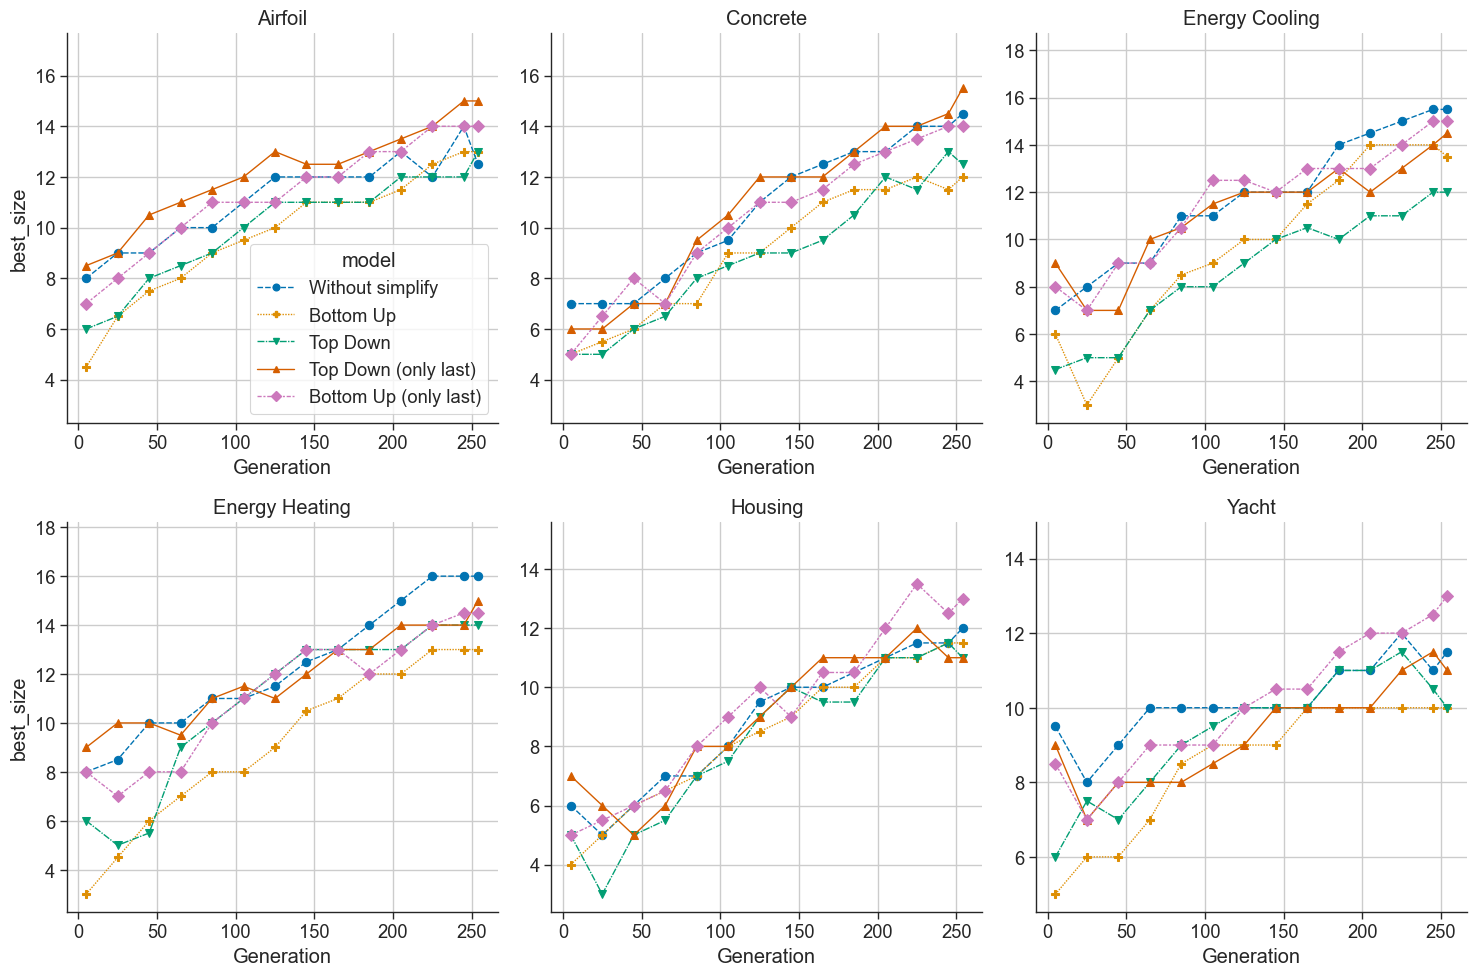

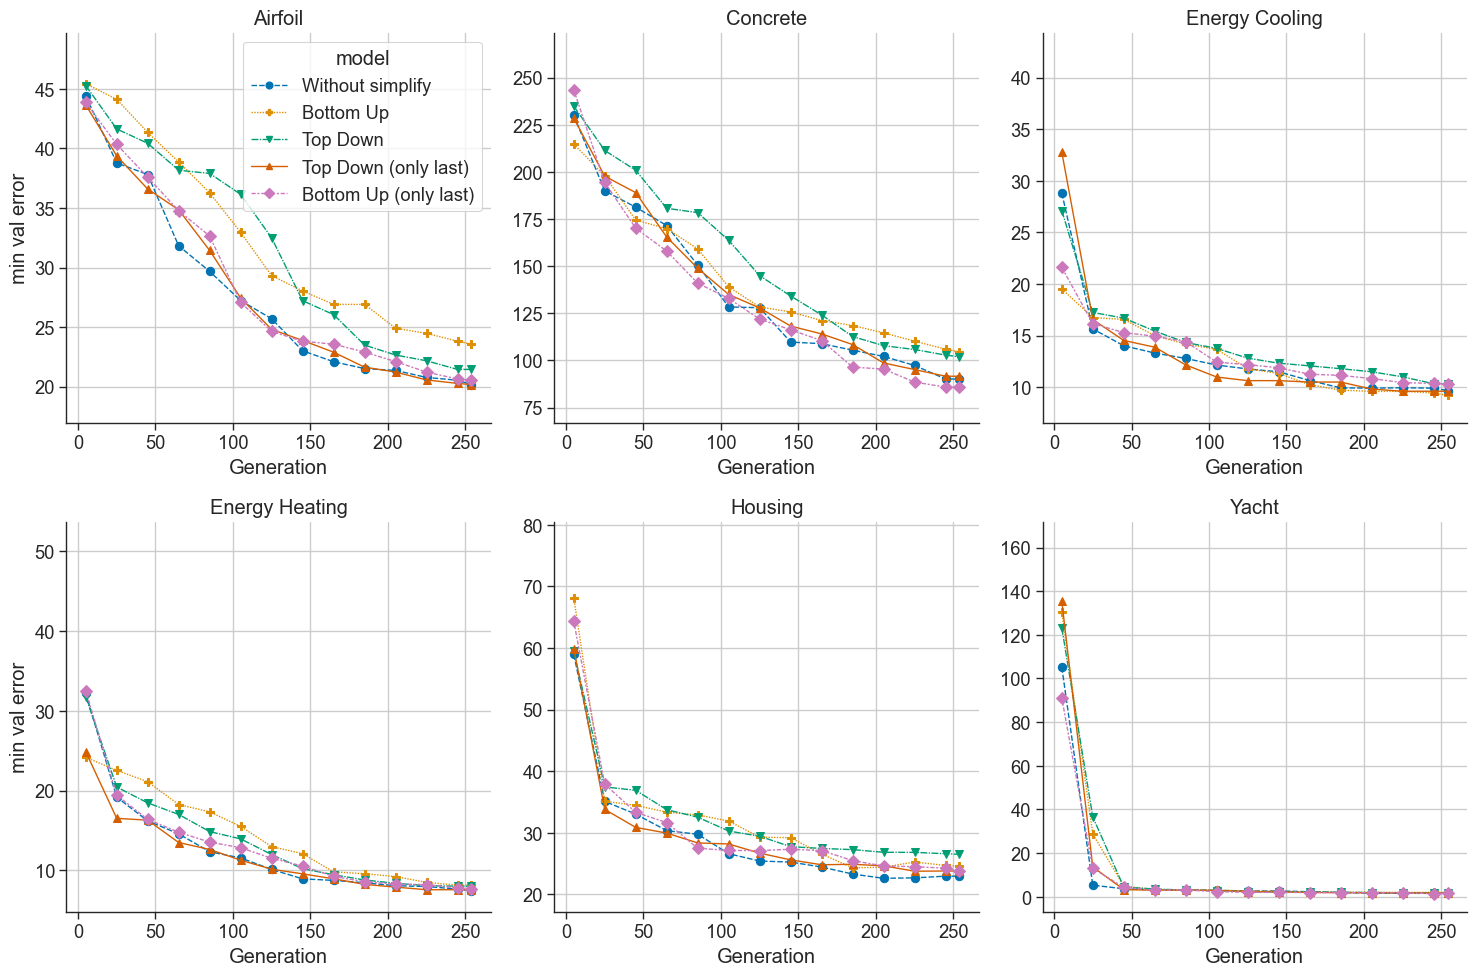

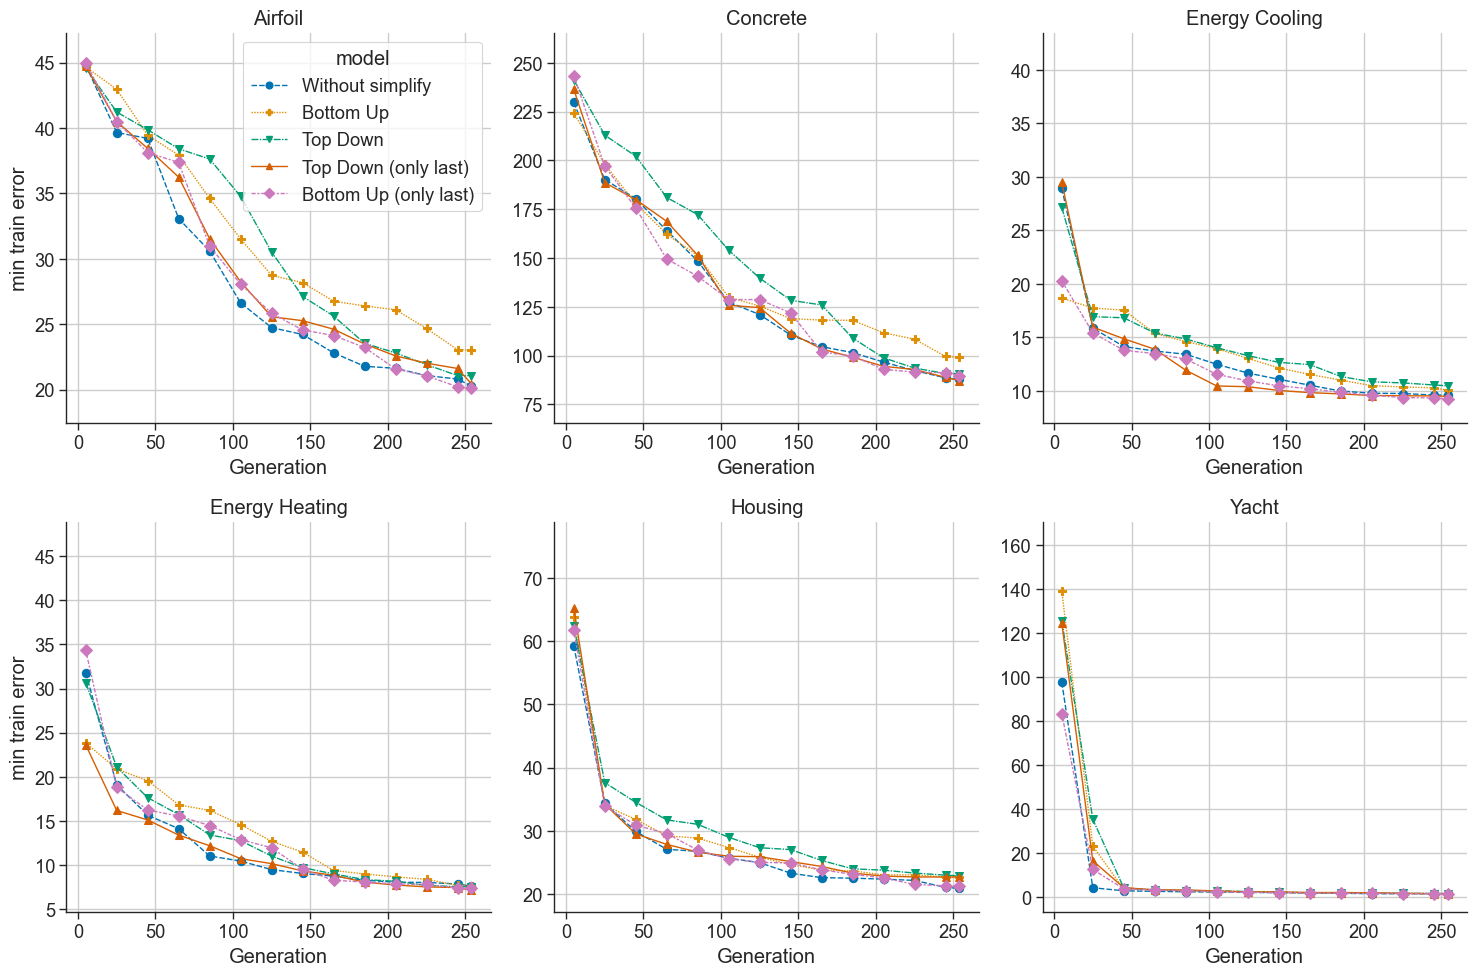

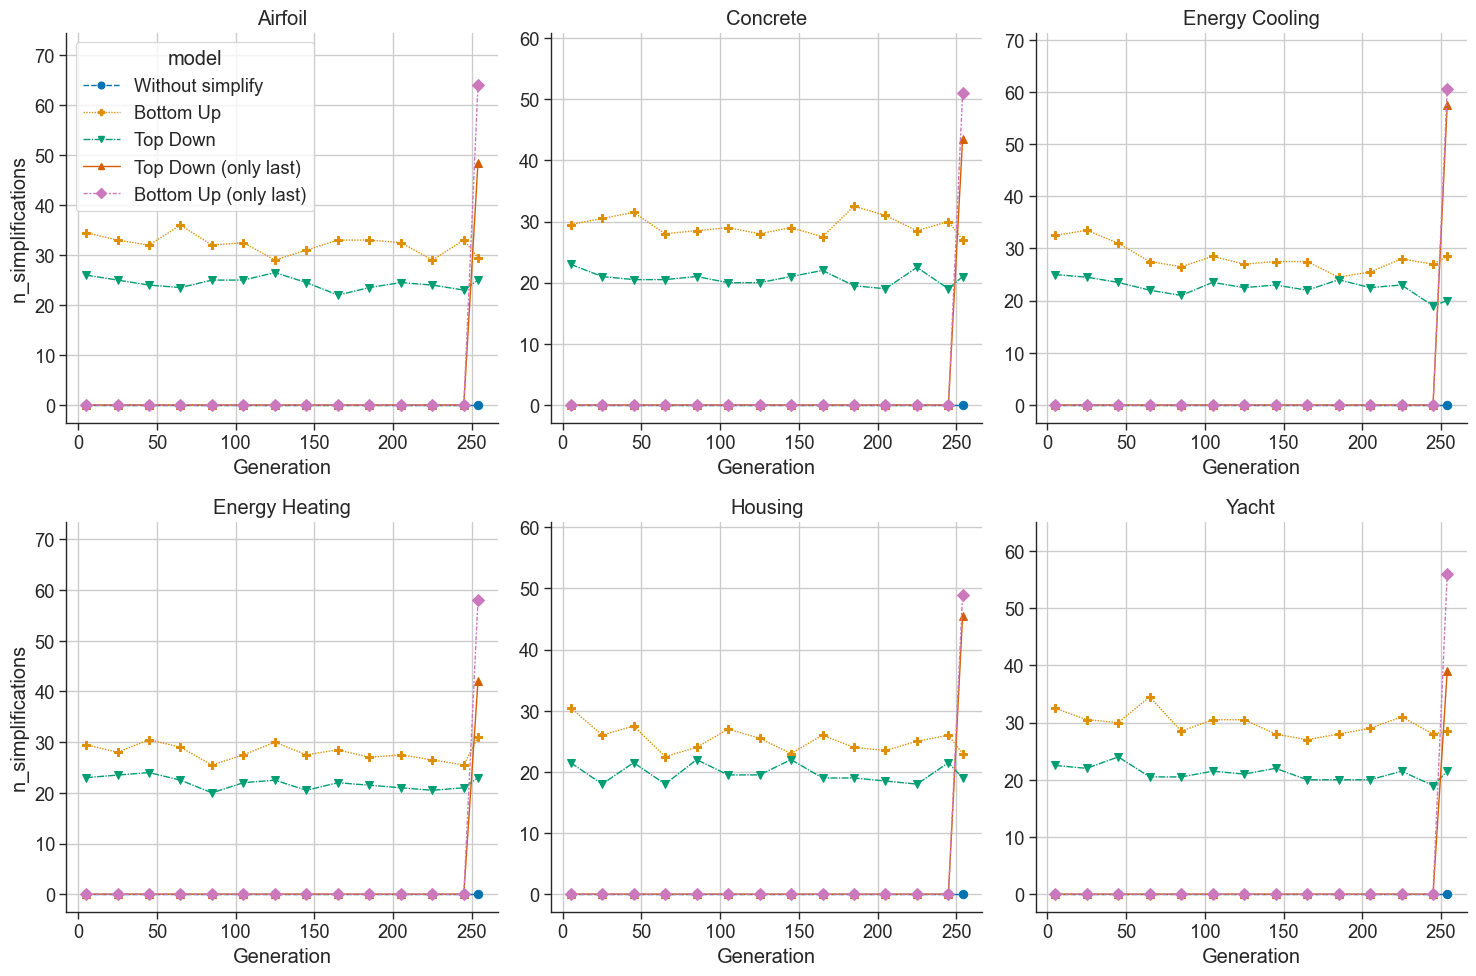

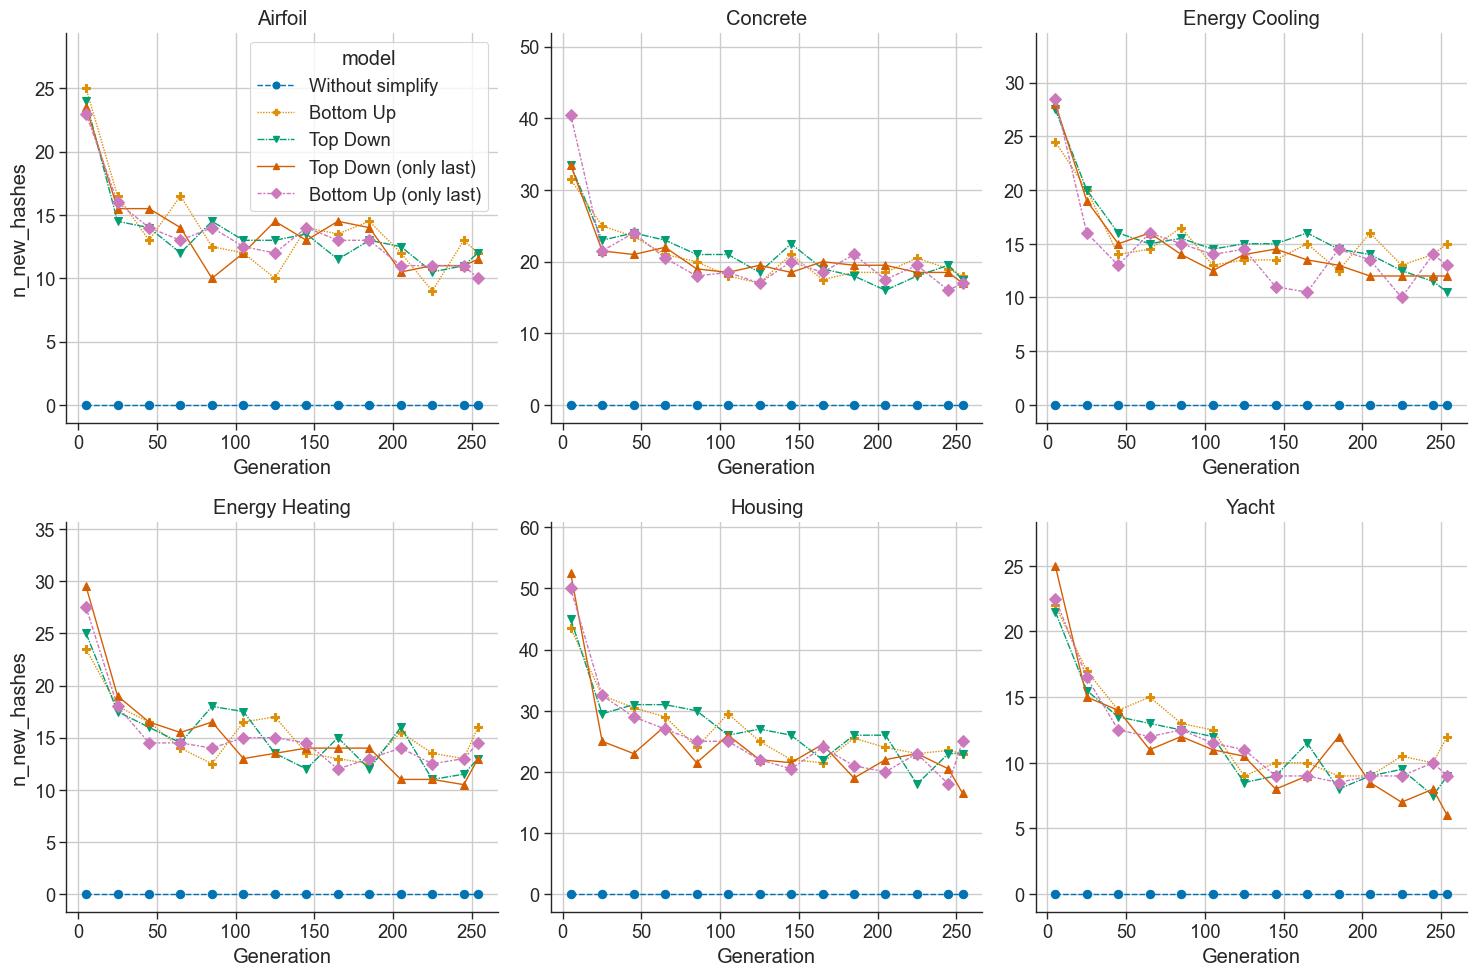

In [3]:
for col in [
    'best_size','min val error', 'min train error',
    'n_simplifications','n_new_hashes',
    #'med train error','med train size','med val error','med val size',
]:
    
    # about errors: https://seaborn.pydata.org/tutorial/error_bars.html
    g = sns.relplot(
        data=all_data_df,
        x="gen", y=col, col="dataset", hue="model",
        style="model", col_wrap=col_wrap, markers=marker_choice, markeredgecolor=None, 
        kind="line", facet_kws={'sharey': False, 'sharex': False, 'legend_out':False}, 
        hue_order = order, estimator=np.median, markersize=6,
        
        err_style='bars', err_kws={'capsize':0.0, 'linewidth':0.0},
        #err_style='bars', err_kws={'capsize':2.0, 'linewidth':0.5}, # 2.0, 0.5
        #err_style='band', err_kws={'alpha':0.1},
    )
    g.set_titles("{col_name}")

    for (ds, plot_ax) in g._axes_dict.items():
        plot_ax.grid(which='major', axis='both', linewidth=1)
        plot_ax.set_xlabel("Generation")

    if False: # use log scale
        # g.set(xscale="log")
        g.set(yscale="log")

    plt.tight_layout()
    plt.savefig(f"../paper/figs/{col}.pdf")
    plt.savefig(f"../paper/figs/{col}.png")
    plt.show()